In [1]:
pip install labelImg

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = 'cat_dog/annotations/1.txt'
with open(file_path, 'r') as file:
    content = file.read()
    print(content)

0 0.665984 0.250455 0.299180 0.355191



In [3]:
file_list = []

directory = "cat_dog/annotations"

for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)       
        with open(file_path, 'r') as file:
            values = file.read()
            file_list.append(values)

print(file_list)

['0 0.665984 0.250455 0.299180 0.355191\n', '0 0.452727 0.404372 0.258182 0.404372\n1 0.641818 0.516393 0.112727 0.169399\n', '1 0.433962 0.443396 0.559748 0.874214\n', '1 0.400500 0.372047 0.667000 0.384139\n', '0 0.504375 0.482424 0.951250 0.787879\n', '0 0.328094 0.343658 0.247544 0.374631\n1 0.569745 0.528024 0.168959 0.206490\n', '0 0.737500 0.522727 0.303000 0.395623\n1 0.560000 0.547138 0.164000 0.329966\n', 'dog\ncat\n']


In [4]:
# Remove '\n' from each string in the list
modified_list = [item.replace('\n', '').replace('\n1', '') for item in file_list]

print(modified_list)

['0 0.665984 0.250455 0.299180 0.355191', '0 0.452727 0.404372 0.258182 0.4043721 0.641818 0.516393 0.112727 0.169399', '1 0.433962 0.443396 0.559748 0.874214', '1 0.400500 0.372047 0.667000 0.384139', '0 0.504375 0.482424 0.951250 0.787879', '0 0.328094 0.343658 0.247544 0.3746311 0.569745 0.528024 0.168959 0.206490', '0 0.737500 0.522727 0.303000 0.3956231 0.560000 0.547138 0.164000 0.329966', 'dogcat']


In [5]:
# Remove the first value of each element in the list
modified_list1 = [' '.join(item.split()[1:]) for item in modified_list]

# Print the modified list
print(modified_list1)

['0.665984 0.250455 0.299180 0.355191', '0.452727 0.404372 0.258182 0.4043721 0.641818 0.516393 0.112727 0.169399', '0.433962 0.443396 0.559748 0.874214', '0.400500 0.372047 0.667000 0.384139', '0.504375 0.482424 0.951250 0.787879', '0.328094 0.343658 0.247544 0.3746311 0.569745 0.528024 0.168959 0.206490', '0.737500 0.522727 0.303000 0.3956231 0.560000 0.547138 0.164000 0.329966', '']


In [6]:
sublists = [item.split() for item in modified_list1]

# Print the sublists
print(sublists)

[['0.665984', '0.250455', '0.299180', '0.355191'], ['0.452727', '0.404372', '0.258182', '0.4043721', '0.641818', '0.516393', '0.112727', '0.169399'], ['0.433962', '0.443396', '0.559748', '0.874214'], ['0.400500', '0.372047', '0.667000', '0.384139'], ['0.504375', '0.482424', '0.951250', '0.787879'], ['0.328094', '0.343658', '0.247544', '0.3746311', '0.569745', '0.528024', '0.168959', '0.206490'], ['0.737500', '0.522727', '0.303000', '0.3956231', '0.560000', '0.547138', '0.164000', '0.329966'], []]


In [7]:
# Remove the last element from the list of sublists
sublists = sublists[:-1]

# Print the modified sublists
print(sublists)

[['0.665984', '0.250455', '0.299180', '0.355191'], ['0.452727', '0.404372', '0.258182', '0.4043721', '0.641818', '0.516393', '0.112727', '0.169399'], ['0.433962', '0.443396', '0.559748', '0.874214'], ['0.400500', '0.372047', '0.667000', '0.384139'], ['0.504375', '0.482424', '0.951250', '0.787879'], ['0.328094', '0.343658', '0.247544', '0.3746311', '0.569745', '0.528024', '0.168959', '0.206490'], ['0.737500', '0.522727', '0.303000', '0.3956231', '0.560000', '0.547138', '0.164000', '0.329966']]


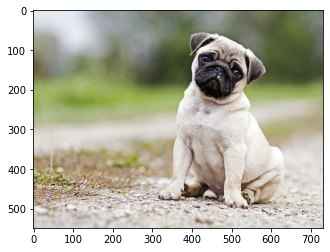

In [13]:
path = 'cat_dog/1.jpeg'
img = cv2.imread(path)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

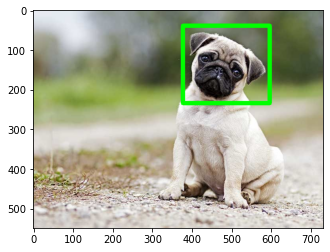

In [14]:
coordinates = [0.665984, 0.250455, 0.299180, 0.355191]
# x, y, w, h = map(float, coordinates)
x1, y1, x2, y2 = coordinates

color = (0, 255, 0)  # Green color for the rectangle
thickness = 10  # Thickness of the rectangle border
    
height, width, _ = img.shape
x1_pixel = int((x1-x2/2) * width)
y1_pixel = int((y1-y2/2) * height)
x4_pixel = int((x1+x2/2) * width)
y4_pixel = int((y1+y2/2) * height)

cv2.rectangle(image_rgb, (x1_pixel, y1_pixel), (x4_pixel, y4_pixel), color, thickness)

# # Display the image with rectangles
plt.imshow(image_rgb)
plt.show()

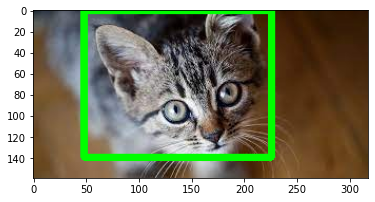

In [16]:
path = 'cat_dog/3.jpeg'
img = cv2.imread(path)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
coordinates = [0.433962, 0.443396, 0.559748, 0.874214]
# x, y, w, h = map(float, coordinates)
x1, y1, x2, y2 = coordinates

color = (0, 255, 0)  # Green color for the rectangle
thickness = 5  # Thickness of the rectangle border
    
height, width, _ = img.shape
x1_pixel = int((x1-x2/2) * width)
y1_pixel = int((y1-y2/2) * height)
x4_pixel = int((x1+x2/2) * width)
y4_pixel = int((y1+y2/2) * height)

cv2.rectangle(image_rgb, (x1_pixel, y1_pixel), (x4_pixel, y4_pixel), color, thickness)

# # Display the image with rectangles
plt.imshow(image_rgb)
plt.show()